## HDFC BANK FINANCIALS 

##### Notebook created: April 3, 2023.

##### This project provides a comprehensive financial analysis of HDFC Bank. The project starts with importing financial data from yahoo finance and presents basic price analysis. It details in the company's financial statements such as the balance sheet, income statements, and cash flow statement. 

##### This analysis provides insight into a company's profitability, liquidity, and solvency, allowing investors to assess a company's financial health and potential risks. Additionally, the notebook uses predictive modeling techniques to predict future financial performance based on historical data. 

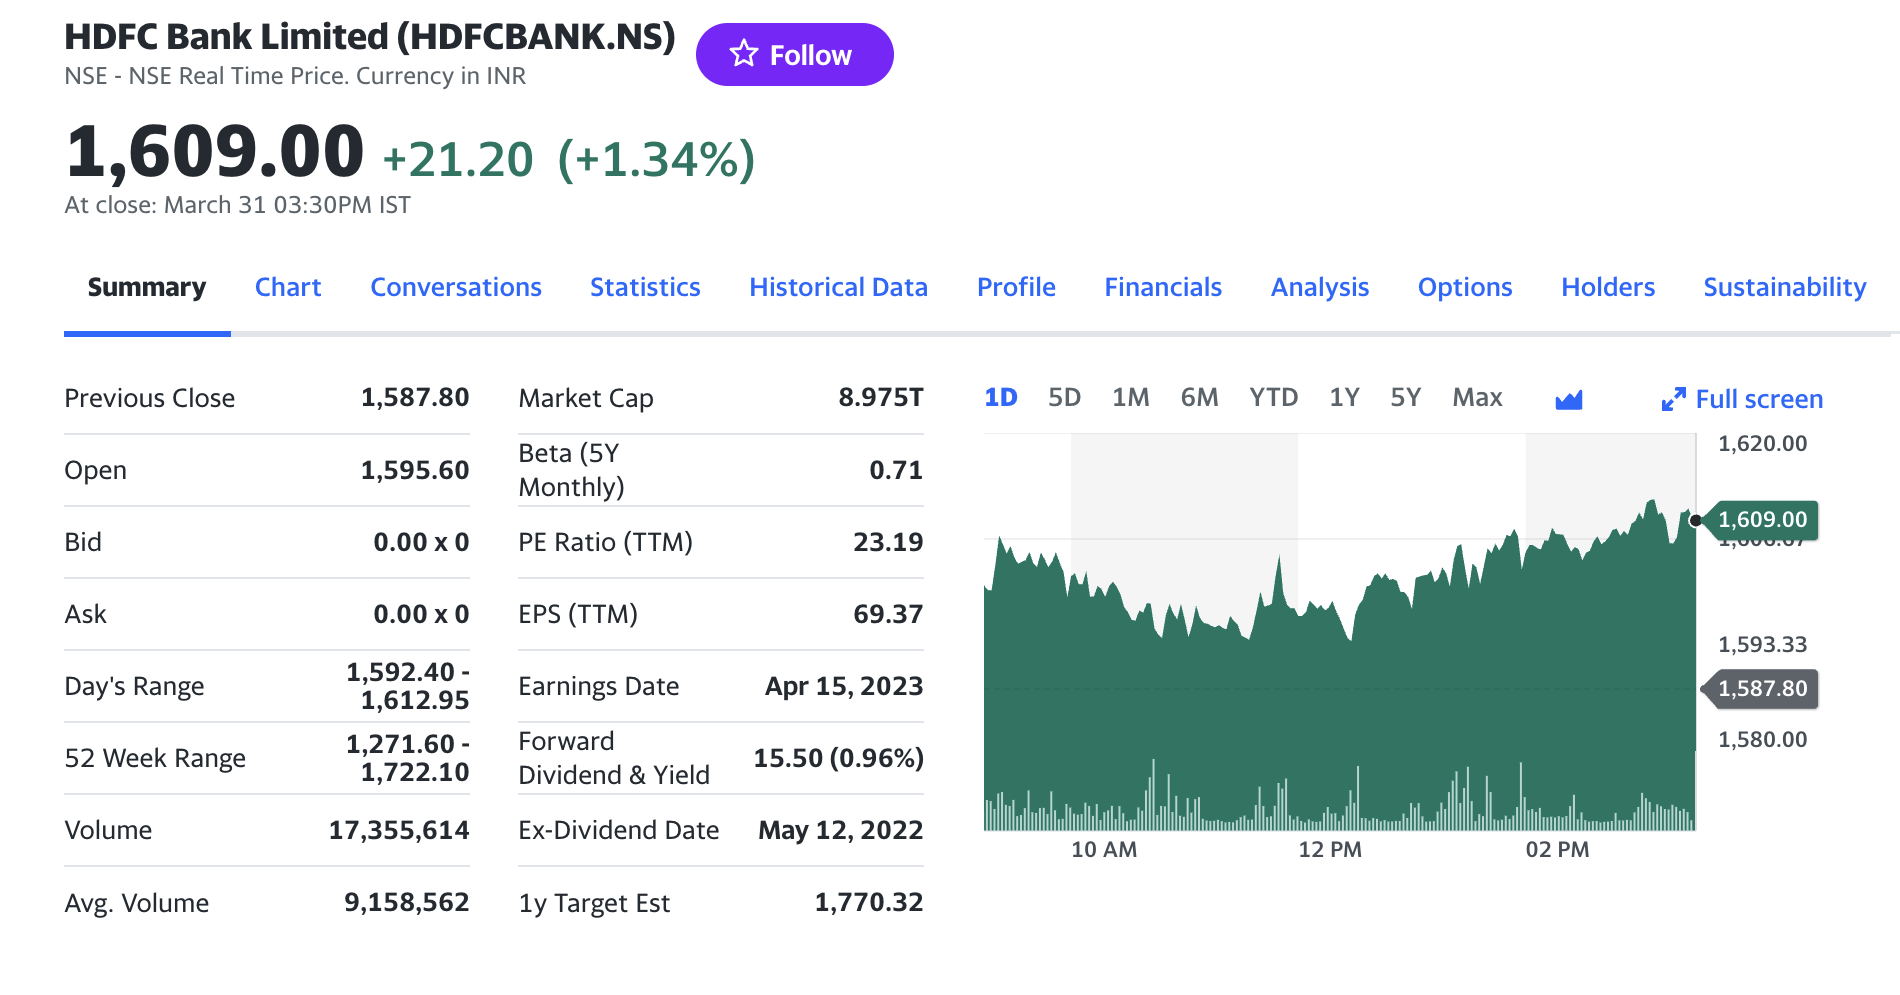

#### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
import numpy_financial as npf
import yfinance as yf
import warnings 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import datetime

In [2]:
class Stock:
    def __init__(self, ticker):
        self.ticker = ticker
    def get_stock(self,ticker):
        stock = yf.Ticker(ticker).history(period="Max")
        return stock

In [3]:
HDFCBANK = Stock("HDFCBANK.NS").get_stock("HDFCBANK.NS")

In [4]:
HDFCBANK.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-03-24 00:00:00+05:30,1560.000000,1573.900024,1554.949951,1560.650024,15738874,0.0,0.0
2023-03-27 00:00:00+05:30,1562.199951,1579.449951,1558.900024,1567.449951,15936003,0.0,0.0
2023-03-28 00:00:00+05:30,1565.699951,1582.900024,1564.099976,1580.199951,19638151,0.0,0.0
2023-03-29 00:00:00+05:30,1584.000000,1602.000000,1581.900024,1587.800049,19881806,0.0,0.0
2023-03-31 00:00:00+05:30,1595.599976,1612.949951,1592.400024,1609.550049,17355614,0.0,0.0


In [5]:
x = HDFCBANK.index

In [6]:
y = HDFCBANK.Close

In [7]:
#Plot class will plot graph through taking two argument x and y
#These instance variables represent the data that will be plotted on the line plot.
class Plot:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def line_plot(self, x,y):
        from matplotlib.ticker import FuncFormatter
        plt.style.use('dark_background')
        fig, ax = plt.subplots(figsize=(12, 6))
        plt.plot(x,y, color="royalblue", alpha=0.9)
        plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
        ax.grid(color='white', alpha=0.20)
        plt.show()
    def bar_plot(self, x,y):
        from matplotlib.ticker import FuncFormatter
        plt.style.use('dark_background')
        fig, ax = plt.subplots(figsize=(12, 6))
        plt.bar(x,y, color="royalblue", alpha=0.9)
        plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
        ax.grid(color='white', alpha=0.20)
        plt.show()

#### CLOSE PRICE & VOLUME FOR 365 DAYS

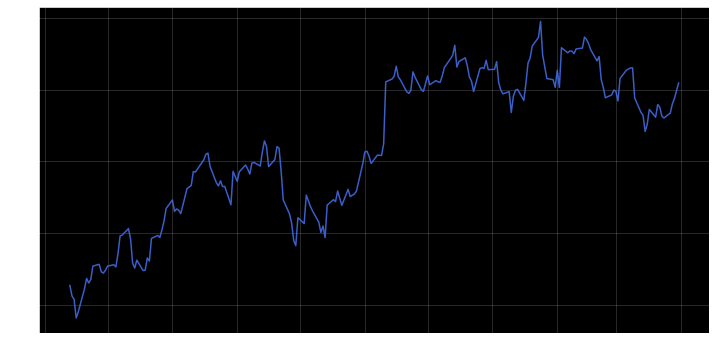

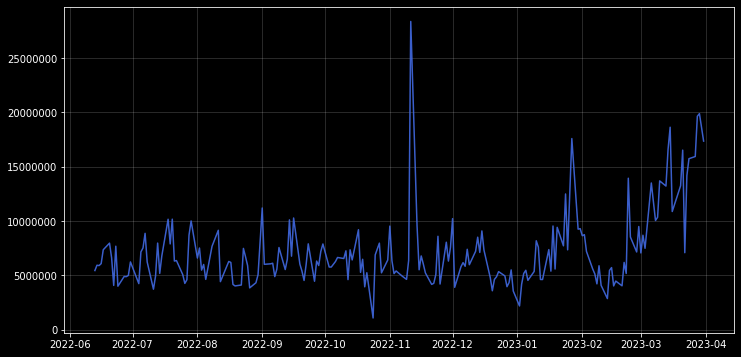

In [8]:
my_plot = Plot(x,y).line_plot(x[6654:],y[6654:])
my_plot = Plot(x,y).line_plot(x = HDFCBANK.index[6654:], y = HDFCBANK.Volume[6654:])

### Calculating Moving Averages 

In [9]:
class StockMovingAverageShort:
    def __init__(self, ticker):
        self.ticker = ticker
        
    def moving_average(self, ticker):
        stock = yf.Ticker(ticker).history(period="max")
        stock['Price_shift_1'] = stock['Close'].shift(-1)
        stock['Price_Difference'] = stock["Price_shift_1"] - stock['Close']
        stock['Return'] = stock['Price_Difference'] / stock['Close']
        stock['Direction'] = np.where(stock['Price_Difference'] > 0, 1, -1)
        stock['3-Day_Moving_Average'] = (stock['Close'] + stock['Close'].shift(1) + stock['Close'].shift(2))/3
        stock['150-Day_Moving_Average'] = stock['Close'].rolling(150).mean()
        stock['200-Day_Moving_Average'] = stock['Close'].rolling(200).mean()
        return stock

In [10]:
obj = StockMovingAverageShort("HDFCBANK.NS").moving_average("HDFCBANK.NS")

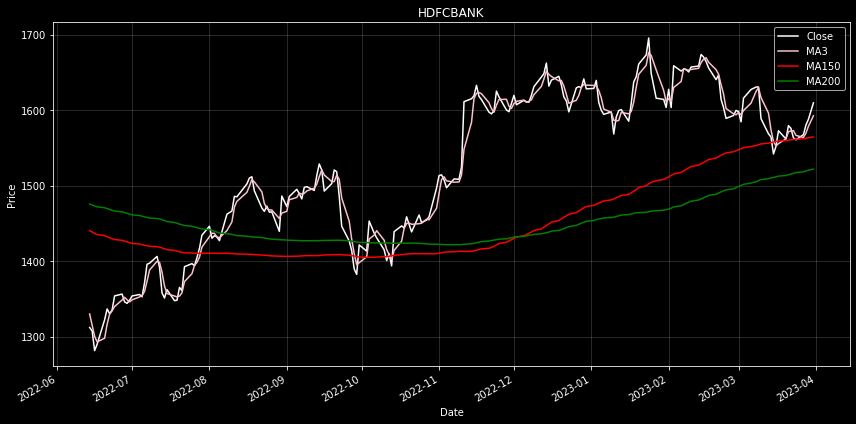

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))
obj['Close'].tail(200).plot(label='Close', ax=ax, color="white")
obj['3-Day_Moving_Average'].tail(200).plot(label='MA3', ax=ax, color="pink")
obj['150-Day_Moving_Average'].tail(200).plot(label='MA150', ax=ax, color="red")
obj['200-Day_Moving_Average'].tail(200).plot(label='MA200', ax=ax, color="green")
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('HDFCBANK')
ax.legend()
ax.grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()

### RETURNS

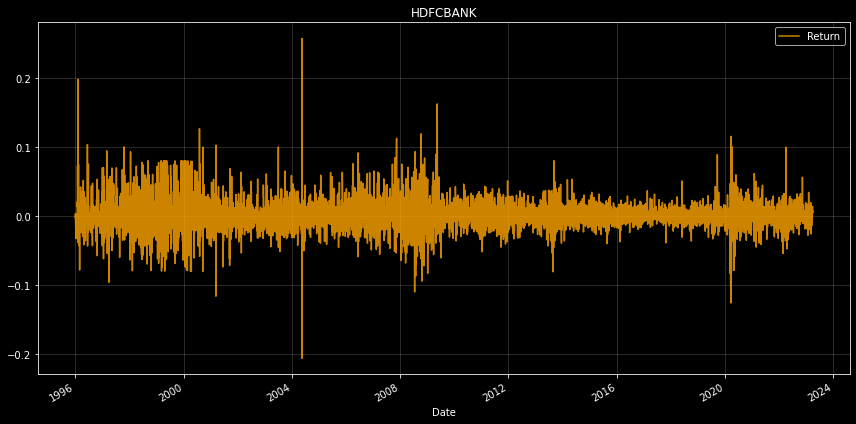

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))
obj.Return.plot(color="orange", alpha=0.80)
ax.set_xlabel('Date')
ax.set_title('HDFCBANK')
ax.legend()
ax.grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()

## <font color="lightblue"> 3 YEAR TIME SERIES ANALYSIS

In [13]:
HDFCBANK = yf.Ticker("HDFCBANK.NS")
data = HDFCBANK.history(period="5y")

In [14]:
data['Date_ordinal'] = [datetime.toordinal(d) for d in data.index]
X_train, X_test, y_train, y_test = train_test_split(data['Date_ordinal'].values.reshape(-1, 1), data['Close'], test_size=0.2, random_state=0)

In [15]:
# Create a linear regression model
model = LinearRegression()

In [16]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Predict the values
y_pred = model.predict(X_test)

In [18]:
X_test = [datetime.fromordinal(int(d)) for d in X_test.flatten()]

In [19]:
model.intercept_

-267862.43904379325

In [20]:
model.coef_

array([0.36482439])

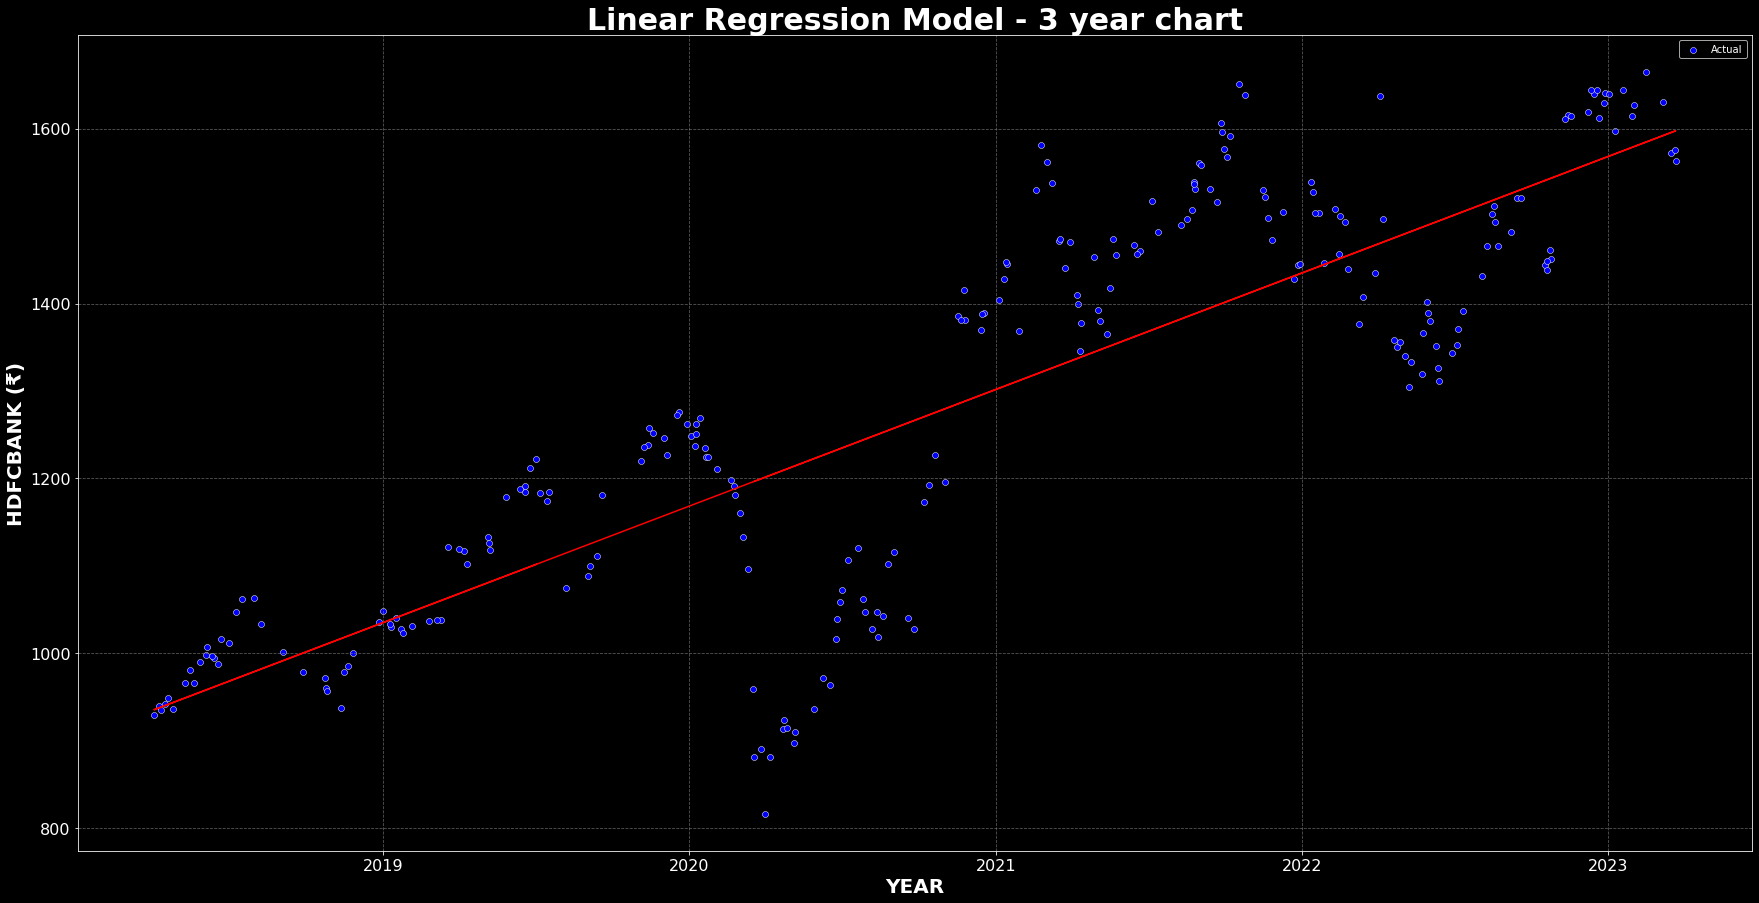

In [21]:
plt.style.use('dark_background')
plt.figure(figsize=(30,15))
sns.scatterplot(x=X_test, y=y_test, label='Actual', color='blue')
plt.plot(X_test, y_pred, label='Predicted', color='red')
plt.title('Linear Regression Model - 3 year chart', fontsize=30, color="White", fontweight='bold')
plt.xlabel("YEAR", fontsize=20, fontweight='bold')
plt.ylabel("HDFCBANK (₹)", fontsize=20, fontweight='bold')
plt.tick_params(axis="both", labelsize=16)
plt.grid(linestyle='--', color='gray', alpha=0.7)
plt.show()

# <font color="red"> DESIGNING MODEL FOR INCOME STATEMENT 

In [22]:
hdfcbank_income_statement = pd.read_csv('HDFCBANK_INCOME STATEMENT .csv')

In [23]:
hdfcbank_income_statement.columns.values[0] = "breakdown"

In [24]:
hdfcbank_income_statement

,breakdown,2022,2021,2020
0,Total Revenue,1019413700,9.366622e+08,7.917464e+08
1,Credit Losses Provision,-126979500,-1.542334e+08,-1.176219e+08
2,Non Interest Expense,373272000,3.426023e+08,3.082805e+08
3,Pretax Income,519162200,4.398265e+08,3.658440e+08
4,Tax Provision,132559200,1.138201e+08,1.054800e+08
5,Net Income Common Stockholders,386000400,3.259771e+08,2.602699e+08
6,Diluted NI Available to Com Stockholders,386000400,3.259771e+08,2.602699e+08
7,Basic EPS,-,5.927000e+01,4.759000e+01
8,Diluted EPS,-,5.902000e+01,4.727000e+01
9,Basic Average Shares,-,5.499587e+06,5.468802e+06


#### TOTAL REVENUE

In [25]:
data = hdfcbank_income_statement.loc[0]
data

breakdown    Total Revenue
2022            1019413700
2021           936662200.0
2020           791746400.0
Name: 0, dtype: object

In [26]:
year = []
revenue = []
for k, v in data.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        revenue.append(int(v))
year = pd.DataFrame(year)
revenue = pd.DataFrame(revenue)

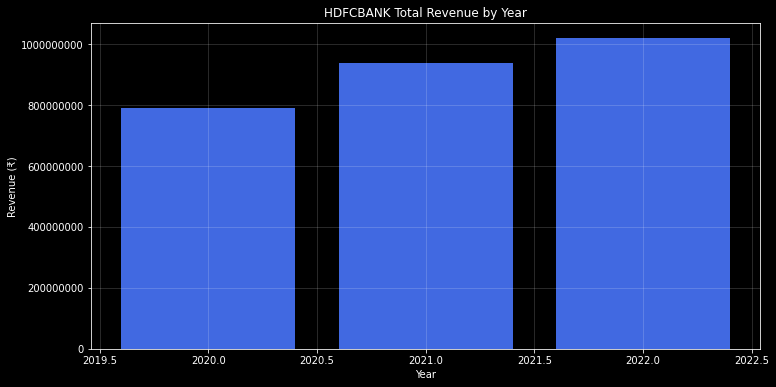

In [27]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(year[0],revenue[0], color="royalblue")
plt.ticklabel_format(axis='y', style='plain')
plt.title("HDFCBANK Total Revenue by Year")
plt.xlabel("Year")
plt.ylabel("Revenue (₹)")
ax.grid(color='white', alpha=0.20)
plt.show()

### TAX PROVISION

In [28]:
data = hdfcbank_income_statement.loc[4]
data = data.head(10)
data

breakdown    Tax Provision
2022             132559200
2021           113820100.0
2020           105480000.0
Name: 4, dtype: object

In [29]:
year = []
revenue = []
for k, v in data.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        revenue.append(int(v))
year = pd.DataFrame(year)
revenue = pd.DataFrame(revenue)

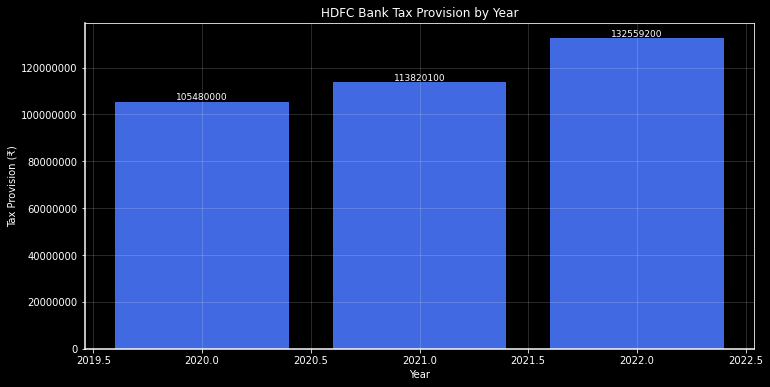

In [30]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(year[0],revenue[0], color="royalblue")
plt.ticklabel_format(axis='y', style='plain')
plt.title("HDFC Bank Tax Provision by Year")
plt.xlabel("Year")
plt.ylabel("Tax Provision (₹)")
for i in range(len(year)):
    plt.text(year.iloc[i], revenue.iloc[i], str(revenue.iloc[i][0]), ha='center', va='bottom', fontsize=9)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
ax.grid(color='white', alpha=0.20)
plt.show()

### INTEREST INCOME AFTER PROVISION FOR LOAN LOSS

In [31]:
data2 = hdfcbank_income_statement.loc[11]
data2

breakdown    INTEREST_INCOME_AFTER_PROVISION_FOR_LOAN_LOSS
2022                                             621860000
2021                                           529453100.0
2020                                           475905500.0
Name: 11, dtype: object

In [32]:
year = []
revenue = []
for k, v in data.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        revenue.append(int(v))
year = pd.DataFrame(year)
revenue = pd.DataFrame(revenue)

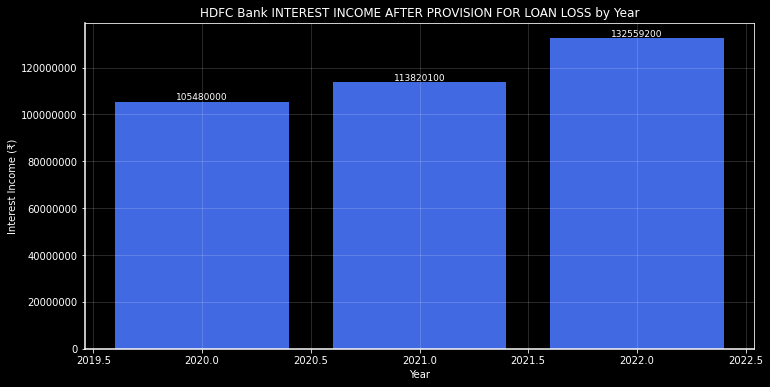

In [33]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(year[0],revenue[0], color="royalblue")
plt.ticklabel_format(axis='y', style='plain')
plt.title("HDFC Bank INTEREST INCOME AFTER PROVISION FOR LOAN LOSS by Year")
plt.xlabel("Year")
plt.ylabel("Interest Income (₹)")
for i in range(len(year)):
    plt.text(year.iloc[i], revenue.iloc[i], str(revenue.iloc[i][0]), ha='center', va='bottom', fontsize=9)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
ax.grid(color='white', alpha=0.20)
plt.show()

### RECONCILED DEPRECIATION

In [34]:
data3 = hdfcbank_income_statement.loc[15]
data3

breakdown    Reconciled Depreciation
2022                        16816900
2021                      13860200.0
2020                      12800300.0
Name: 15, dtype: object

In [35]:
year = []
revenue = []
for k, v in data.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        revenue.append(int(v))
year = pd.DataFrame(year)
revenue = pd.DataFrame(revenue)

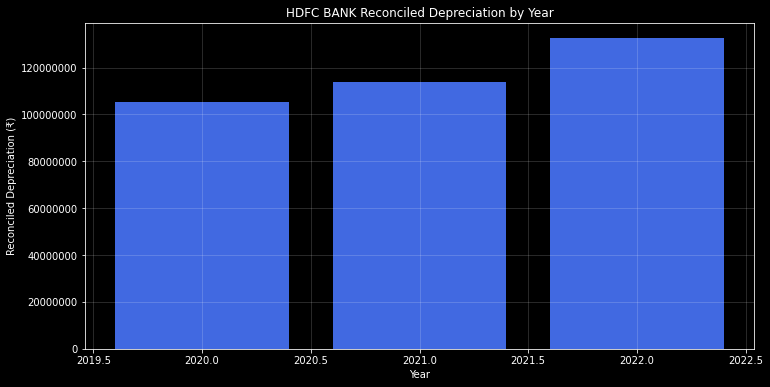

In [36]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(year[0],revenue[0], color="royalblue")
plt.ticklabel_format(axis='y', style='plain')
plt.title("HDFC BANK Reconciled Depreciation by Year")
plt.xlabel("Year")
plt.ylabel("Reconciled Depreciation (₹)")
ax.grid(color='white', alpha=0.20)
plt.show()

### NET INCOME FROM CONTINUING OPERATION NET MINORIOTY INTEREST BY YEAR

In [37]:
data4 = hdfcbank_income_statement.loc[16]
data4

breakdown    Net Income from Continuing Operation Net Minor...
2022                                                 386000400
2021                                               325977100.0
2020                                               260269900.0
Name: 16, dtype: object

In [38]:
year = []
revenue = []
for k, v in data.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        revenue.append(int(v))
year = pd.DataFrame(year)
revenue = pd.DataFrame(revenue)

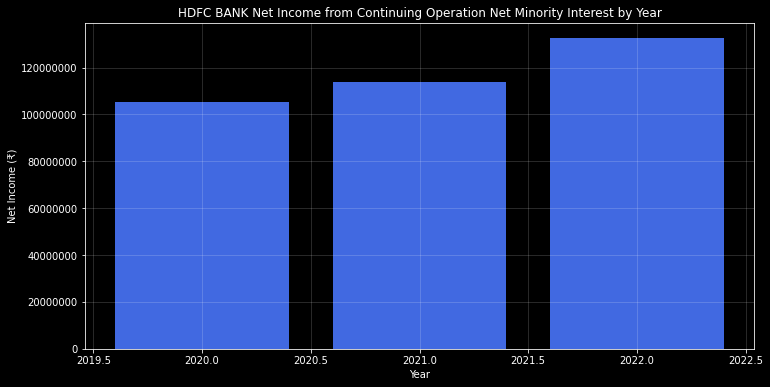

In [39]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(year[0],revenue[0], color="royalblue")
plt.ticklabel_format(axis='y', style='plain')
plt.title("HDFC BANK Net Income from Continuing Operation Net Minority Interest by Year")
plt.xlabel("Year")
plt.ylabel("Net Income (₹)")
ax.grid(color='white', alpha=0.20)
plt.show()

# <font color="red"> BALANCE SHEET

In [40]:
balance_sheet_annually = pd.read_csv('HDFCBANK BALANCE_SHEET.csv')
balance_sheet_annually.columns.values[0] = "breakdown"
balance_sheet_annually

,breakdown,2022,2021,2020
0,Total Assets,21113705500,17979782000,15961889100
1,Total Liabilities Net Minority Interest,18604252100,15816377200,14065395300
2,Total Equity Gross Minority Interest,2509453400,2163404800,1896493800
3,Total Capitalization,4059171800,3334386600,2919600700
4,Common Stock Equity,2504838400,2159628400,1893082400
5,Capital Lease Obligations,78138000,70422000,65615100
6,Net Tangible Assets,2429900500,2084690500,1818144500
7,Invested Capital,4613339400,3573650700,3297018300
8,Tangible Book Value,2429900500,2084690500,1818144500
9,Total Debt,2186639000,1484444300,1469551000


### TOTAL ASSETS

In [41]:
total_assets = balance_sheet_annually.loc[0]
total_assets

breakdown    Total Assets
2022          21113705500
2021          17979782000
2020          15961889100
Name: 0, dtype: object

In [42]:
year = []
cash = []

for k, v in total_assets.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        cash.append(int(v))

df_total_assets = pd.DataFrame({'year': year, 'cash': cash})

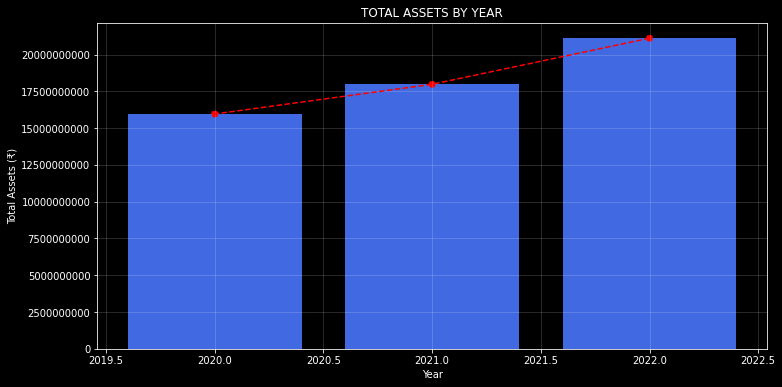

In [43]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar( df_total_assets.year, df_total_assets.cash, color="royalblue")
plt.plot( df_total_assets.year, df_total_assets.cash, color="red", linestyle="--")
plt.scatter( df_total_assets.year, df_total_assets.cash, color="red", linestyle="--")
plt.ticklabel_format(axis='y', style='plain')
plt.title("TOTAL ASSETS BY YEAR")
plt.xlabel("Year")
plt.ylabel("Total Assets (₹)")
ax.grid(color='white', alpha=0.20)
plt.show()

### TOTAL LIABILITIES NET MINORITY INTEREST

In [44]:
Total_Liabilities_Net_Minority_Interests = balance_sheet_annually.loc[1]
Total_Liabilities_Net_Minority_Interests

breakdown    Total Liabilities Net Minority Interest
2022                                     18604252100
2021                                     15816377200
2020                                     14065395300
Name: 1, dtype: object

In [45]:
year = []
cash = []

for k, v in Total_Liabilities_Net_Minority_Interests.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        cash.append(int(v))

df_Total_Liabilities_Net_Minority_Interests = pd.DataFrame({'year': year, 'cash': cash})

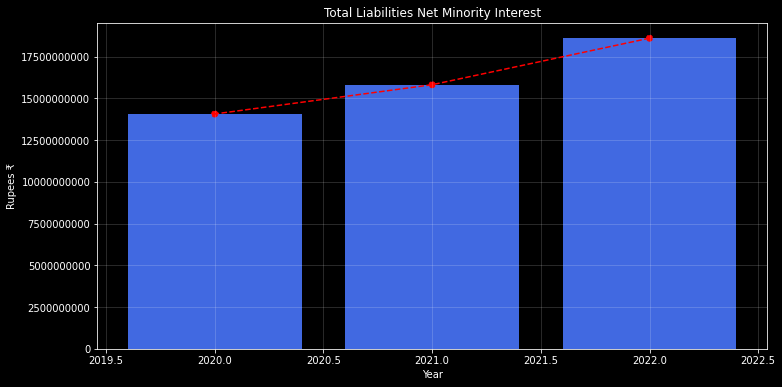

In [46]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar( df_Total_Liabilities_Net_Minority_Interests.year, df_Total_Liabilities_Net_Minority_Interests.cash, color="royalblue")
plt.plot( df_Total_Liabilities_Net_Minority_Interests.year, df_Total_Liabilities_Net_Minority_Interests.cash, color="red", linestyle="--")
plt.scatter( df_Total_Liabilities_Net_Minority_Interests.year, df_Total_Liabilities_Net_Minority_Interests.cash, color="red", linestyle="--")
plt.ticklabel_format(axis='y', style='plain')
plt.title("Total Liabilities Net Minority Interest")
plt.xlabel("Year")
plt.ylabel("Rupees ₹")
ax.grid(color='white', alpha=0.20)
plt.show()

### TOTAL EQUITY GROSS MINORITY INTERESTS 

In [47]:
Total_Equity_Gross_Minority_Interests = balance_sheet_annually.loc[2]
Total_Equity_Gross_Minority_Interests

breakdown    Total Equity Gross Minority Interest
2022                                   2509453400
2021                                   2163404800
2020                                   1896493800
Name: 2, dtype: object

In [48]:
year = []
cash = []

for k, v in Total_Equity_Gross_Minority_Interests.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        cash.append(int(v))

df_Total_Equity_Gross_Minority_Interests = pd.DataFrame({'year': year, 'cash': cash})

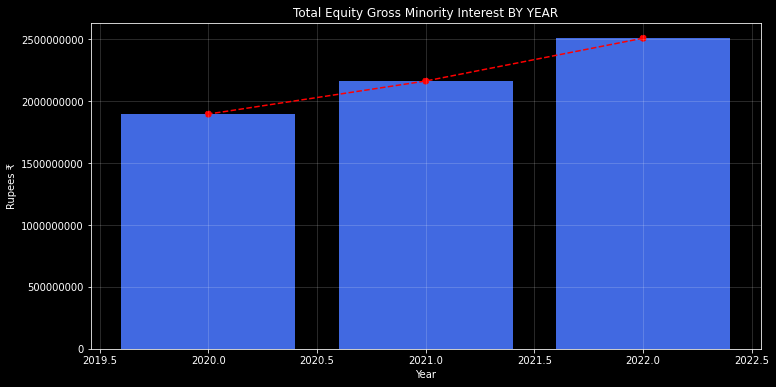

In [49]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar( df_Total_Equity_Gross_Minority_Interests.year, df_Total_Equity_Gross_Minority_Interests.cash, color="royalblue")
plt.plot( df_Total_Equity_Gross_Minority_Interests.year, df_Total_Equity_Gross_Minority_Interests.cash, color="red", linestyle="--")
plt.scatter( df_Total_Equity_Gross_Minority_Interests.year, df_Total_Equity_Gross_Minority_Interests.cash, color="red", linestyle="--")
plt.ticklabel_format(axis='y', style='plain')
plt.title("Total Equity Gross Minority Interest BY YEAR")
plt.xlabel("Year")
plt.ylabel("Rupees ₹")
ax.grid(color='white', alpha=0.20)
plt.show()

### TOTAL CAPITALIZATION

In [50]:
Total_Capitalization = balance_sheet_annually.loc[3]
Total_Capitalization

breakdown    Total Capitalization
2022                   4059171800
2021                   3334386600
2020                   2919600700
Name: 3, dtype: object

In [51]:
year = []
cash = []

for k, v in Total_Capitalization.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        cash.append(int(v))

df_Total_Capitalization = pd.DataFrame({'year': year, 'cash': cash})

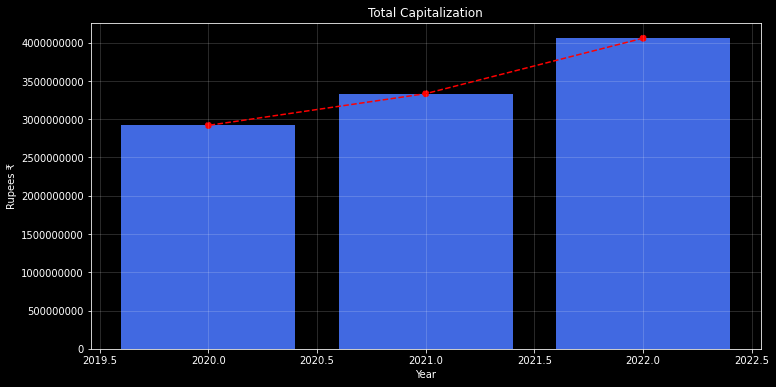

In [52]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar( df_Total_Capitalization.year, df_Total_Capitalization.cash, color="royalblue")
plt.plot( df_Total_Capitalization.year, df_Total_Capitalization.cash, color="red", linestyle="--")
plt.scatter( df_Total_Capitalization.year, df_Total_Capitalization.cash, color="red", linestyle="--")
plt.ticklabel_format(axis='y', style='plain')
plt.title("Total Capitalization")
plt.xlabel("Year")
plt.ylabel("Rupees ₹")
ax.grid(color='white', alpha=0.20)
plt.show()

### COMPARING TOTAL ASSETS AND LIABILITIES

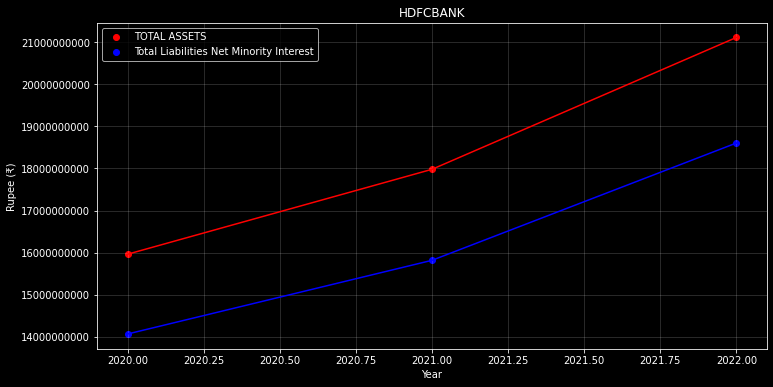

In [53]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))

#Total Assets
plt.plot(df_total_assets.year,df_total_assets.cash, color="red")
plt.scatter(df_total_assets.year,df_total_assets.cash, color="red", label="TOTAL ASSETS")

# Total Liabilities
plt.plot(df_Total_Liabilities_Net_Minority_Interests.year,df_Total_Liabilities_Net_Minority_Interests.cash, color="blue")
plt.scatter(df_Total_Liabilities_Net_Minority_Interests.year,df_Total_Liabilities_Net_Minority_Interests.cash, color="blue", label="Total Liabilities Net Minority Interest")

plt.ticklabel_format(axis='y', style='plain')
plt.title("HDFCBANK")
plt.xlabel("Year")
plt.ylabel("Rupee (₹)")
ax.grid(color='white', alpha=0.20)
plt.legend(loc="upper left")
plt.show()

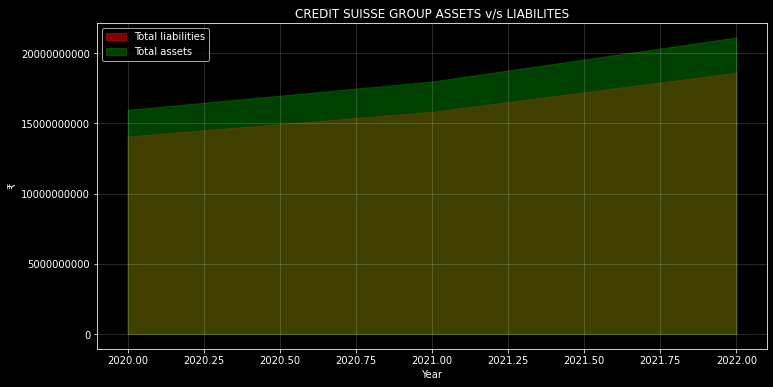

In [54]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
#Total liabilities
plt.fill_between(df_Total_Liabilities_Net_Minority_Interests.year, df_Total_Liabilities_Net_Minority_Interests.cash, color="red", alpha=0.5, label="Total liabilities")
#total assets
plt.fill_between(df_total_assets.year, df_total_assets.cash, color="green", alpha=0.5, label="Total assets")
plt.ticklabel_format(axis='y', style='plain')
plt.title("CREDIT SUISSE GROUP ASSETS v/s LIABILITES")
plt.xlabel("Year")
plt.ylabel("₹")
ax.grid(color='white', alpha=0.20)
plt.legend(loc="upper left")
plt.show()

### COMMON STOCK EQUITY

In [55]:
Common_Stock_Equity = balance_sheet_annually.loc[4]
Common_Stock_Equity

breakdown    Common Stock Equity
2022                  2504838400
2021                  2159628400
2020                  1893082400
Name: 4, dtype: object

In [56]:
year = []
cash = []

for k, v in Common_Stock_Equity.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        cash.append(int(v))

df_Common_Stock_Equity = pd.DataFrame({'year': year, 'cash': cash})

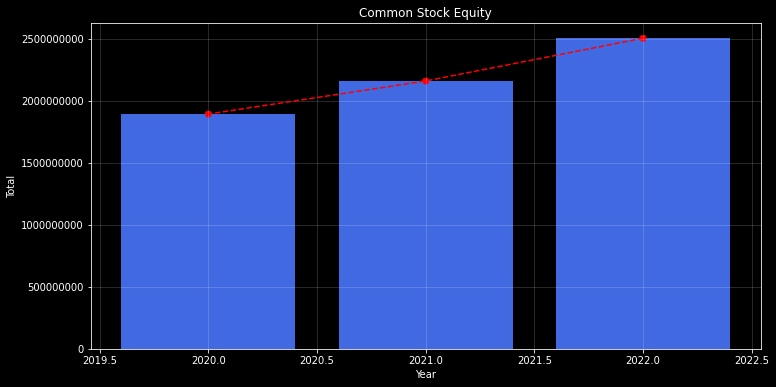

In [57]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar( df_Common_Stock_Equity.year, df_Common_Stock_Equity.cash, color="royalblue")
plt.plot( df_Common_Stock_Equity.year, df_Common_Stock_Equity.cash, color="red", linestyle="--")
plt.scatter( df_Common_Stock_Equity.year, df_Common_Stock_Equity.cash, color="red", linestyle="--")
plt.ticklabel_format(axis='y', style='plain')
plt.title("Common Stock Equity")
plt.xlabel("Year")
plt.ylabel("Total")
ax.grid(color='white', alpha=0.20)
plt.show()

### NET TANGIBLE ASSETS

In [58]:
Net_Tangible_Assets = balance_sheet_annually.loc[6]
Net_Tangible_Assets

breakdown    Net Tangible Assets
2022                  2429900500
2021                  2084690500
2020                  1818144500
Name: 6, dtype: object

In [59]:
year = []
cash = []

for k, v in Net_Tangible_Assets.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        cash.append(int(v))

df_Net_Tangible_Assets = pd.DataFrame({'year': year, 'cash': cash})

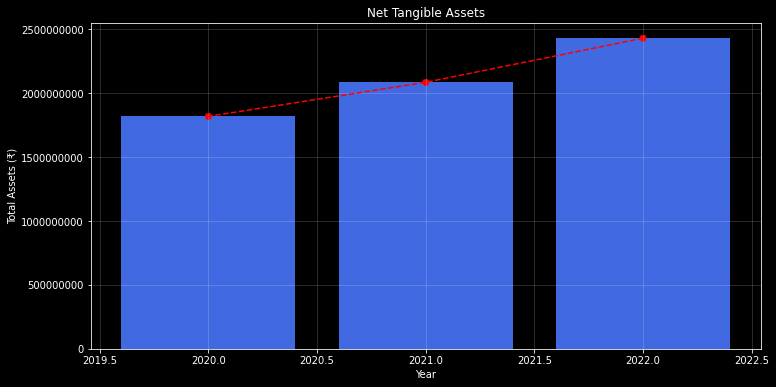

In [60]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar( df_Net_Tangible_Assets.year, df_Net_Tangible_Assets.cash, color="royalblue")
plt.plot( df_Net_Tangible_Assets.year, df_Net_Tangible_Assets.cash, color="red", linestyle="--")
plt.scatter( df_Net_Tangible_Assets.year, df_Net_Tangible_Assets.cash, color="red", linestyle="--")
plt.ticklabel_format(axis='y', style='plain')
plt.title("Net Tangible Assets")
plt.xlabel("Year")
plt.ylabel("Total Assets (₹)")
ax.grid(color='white', alpha=0.20)
plt.show()

### COMPARING TOTAL DEBT AND NET DEBT 

In [61]:
Total_Debt = balance_sheet_annually.loc[9]
Net_Debt = balance_sheet_annually.loc[10]
print(Total_Debt)
print(Net_Debt)

breakdown    Total Debt
2022         2186639000
2021         1484444300
2020         1469551000
Name: 9, dtype: object
breakdown     Net Debt
2022         509280300
2021         372639500
2020         677191800
Name: 10, dtype: object


In [62]:
year = []
cash = []

for k, v in Total_Debt.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        cash.append(int(v))

df_Total_Debt = pd.DataFrame({'year': year, 'cash': cash})

In [63]:
year = []
cash = []
for k, v in Net_Debt.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        cash.append(int(v))

In [64]:
df_Net_Debt = pd.DataFrame({'year': year, 'cash': cash})

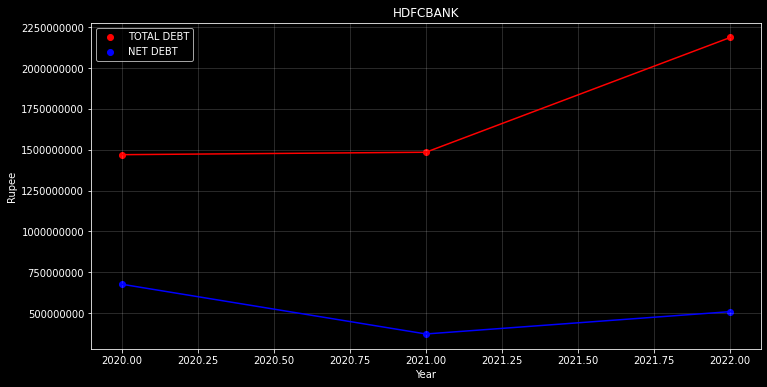

In [65]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))

#Total Assets
plt.plot(df_Total_Debt.year,df_Total_Debt.cash, color="red")
plt.scatter(df_Total_Debt.year,df_Total_Debt.cash, color="red", label="TOTAL DEBT")

# Total Liabilities
plt.plot(df_Net_Debt.year,df_Net_Debt.cash, color="blue")
plt.scatter(df_Net_Debt.year,df_Net_Debt.cash, color="blue", label="NET DEBT")

plt.ticklabel_format(axis='y', style='plain')
plt.title("HDFCBANK")
plt.xlabel("Year")
plt.ylabel("Rupee")
ax.grid(color='white', alpha=0.20)
plt.legend(loc="upper left")
plt.show()

# <font color="red"> CASHFLOW STATEMENT

In [66]:
## pd.set_option('display.max_rows', 100)
cashflow_annually = pd.read_csv('HDFCBANK_CASHFLOW STATEMENT.csv')
cashflow_annually.columns.values[0] = "breakdown"
cashflow_annually

,breakdown,2022,2021,2020
0,Operating Cash Flow,581018200,921776200,171179700
1,Cash Flow from Continuing Operating Activities,581018200,921776200,171179700
2,Net Income from Continuing Operations,386603000,326006400,260364000
3,Operating Gains Losses,-21559700,-56298200,-13322800
4,Gain Loss On Sale of PPE,-900,-16200,81900
...,...,...,...,...
64,Capital Expenditure,-26324400,-17806500,-18294300
65,Issuance of Capital Stock,-,0,0
66,Issuance of Debt,722908900,481989200,272104700
67,Repayment of Debt,-353325700,-326285000,-315209600


### Operating Cashflow Income

In [67]:
operating_cash_flow_income = cashflow_annually.loc[0]
operating_cash_flow_income

breakdown    Operating Cash Flow
2022                   581018200
2021                   921776200
2020                   171179700
Name: 0, dtype: object

In [68]:
year = []
cash = []

for k, v in operating_cash_flow_income.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        cash.append(int(v))

df_operating_cash_flow_income = pd.DataFrame({'year': year, 'cash': cash})

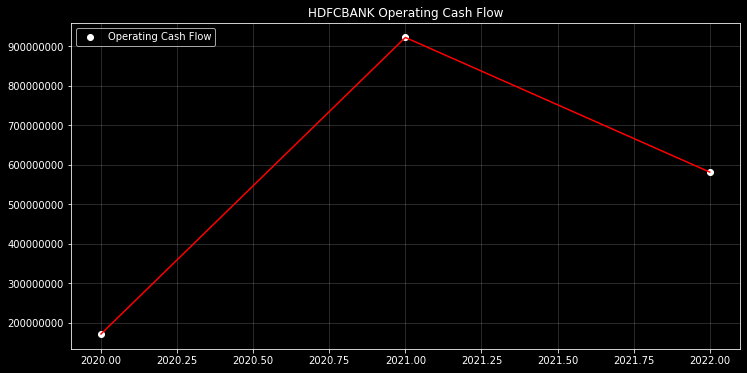

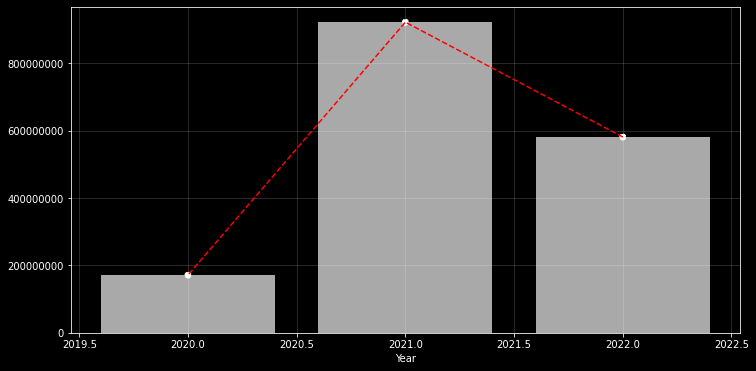

In [69]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))

# Total Liabilities
plt.plot(df_operating_cash_flow_income.year,df_operating_cash_flow_income.cash, color="red")
plt.scatter(df_operating_cash_flow_income.year,df_operating_cash_flow_income.cash, color="white", label="Operating Cash Flow")

plt.ticklabel_format(axis='y', style='plain')
plt.title("HDFCBANK Operating Cash Flow")
ax.grid(color='white', alpha=0.20)
plt.legend(loc="upper left")
plt.show()

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar( df_operating_cash_flow_income.year, df_operating_cash_flow_income.cash, color="darkgrey")
plt.plot( df_operating_cash_flow_income.year, df_operating_cash_flow_income.cash, color="red", linestyle="--")
plt.scatter( df_operating_cash_flow_income.year, df_operating_cash_flow_income.cash, color="white", linestyle="--")
plt.ticklabel_format(axis='y', style='plain')
plt.xlabel("Year")
ax.grid(color='white', alpha=0.20)
plt.show()

### INVESTING CASHFLOW

In [70]:
investing_cashflow = cashflow_annually.loc[32]
investing_cashflow

breakdown    Investing Cash Flow
2022                 -3302279800
2021                 -2521149700
2020                 -2150488400
Name: 32, dtype: object

In [71]:
year = []
cash = []

for k, v in investing_cashflow.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        cash.append(int(v))

df_investing_cashflow = pd.DataFrame({'year': year, 'cash': cash})

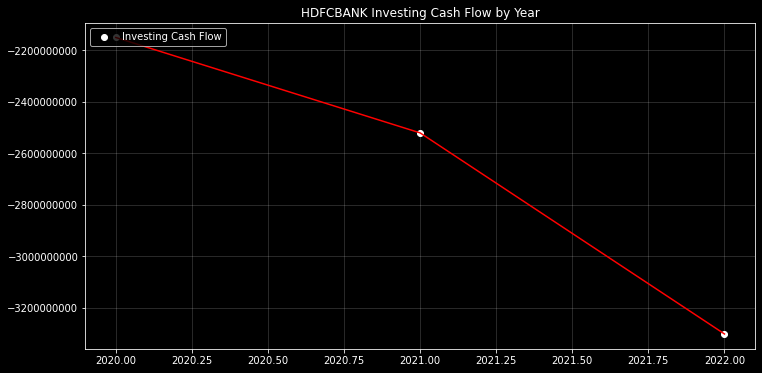

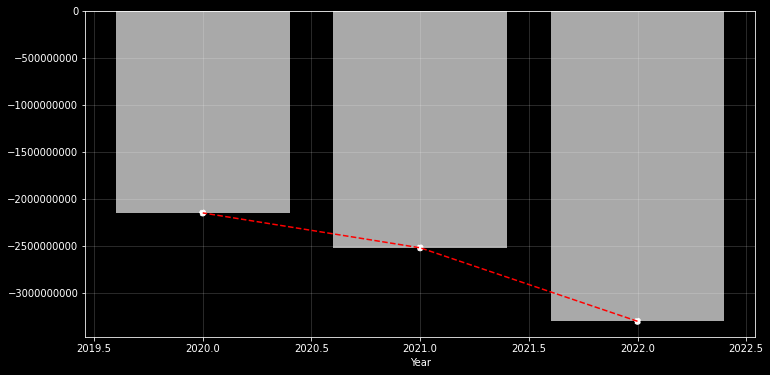

In [72]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))

# Total Liabilities
plt.plot(df_investing_cashflow.year,df_investing_cashflow.cash, color="red")
plt.scatter(df_investing_cashflow.year,df_investing_cashflow.cash, color="white", label="Investing Cash Flow")

plt.ticklabel_format(axis='y', style='plain')
plt.title("HDFCBANK Investing Cash Flow by Year")
ax.grid(color='white', alpha=0.20)
plt.legend(loc="upper left")
plt.show()

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar( df_investing_cashflow.year, df_investing_cashflow.cash, color="darkgrey")
plt.plot( df_investing_cashflow.year, df_investing_cashflow.cash, color="red", linestyle="--")
plt.scatter( df_investing_cashflow.year, df_investing_cashflow.cash, color="white", linestyle="--")
plt.ticklabel_format(axis='y', style='plain')
plt.xlabel("Year")
ax.grid(color='white', alpha=0.20)
plt.show()

### FINANCING CASHFLOW

In [73]:
financing_cashflow = cashflow_annually.loc[45]
financing_cashflow

breakdown    Financing Cash Flow
2022                  2912107500
2021                  1918369400
2020                  1845786600
Name: 45, dtype: object

In [74]:
year = []
cash = []

for k, v in financing_cashflow.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        cash.append(int(v))

df_financing_cashflow = pd.DataFrame({'year': year, 'cash': cash})

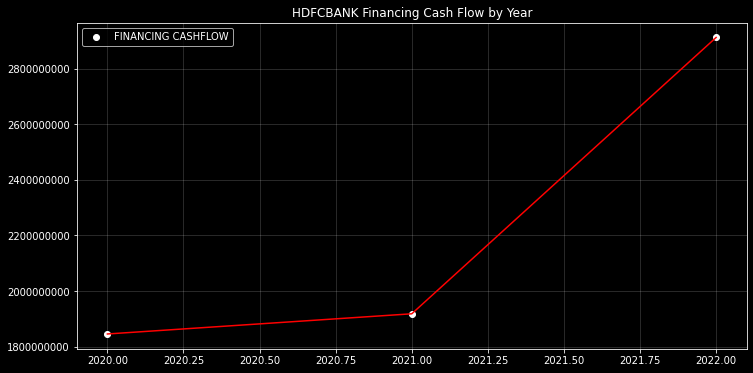

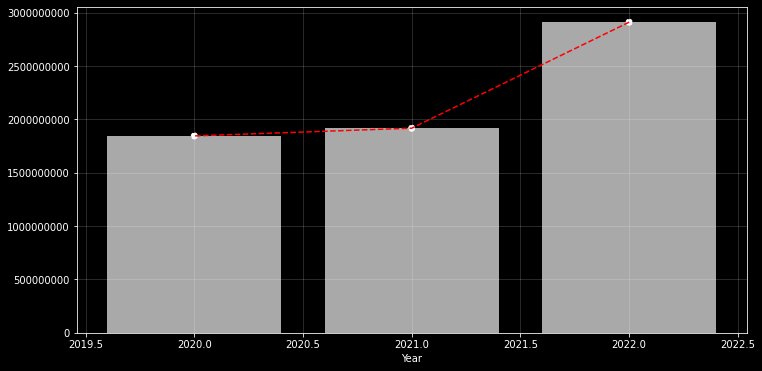

In [75]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))

# Total Liabilities
plt.plot(df_financing_cashflow.year,df_financing_cashflow.cash, color="red")
plt.scatter(df_financing_cashflow.year,df_financing_cashflow.cash, color="white", label="FINANCING CASHFLOW")

plt.ticklabel_format(axis='y', style='plain')
plt.title("HDFCBANK Financing Cash Flow by Year")
ax.grid(color='white', alpha=0.20)
plt.legend(loc="upper left")
plt.show()

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar( df_financing_cashflow.year, df_financing_cashflow.cash, color="darkgrey")
plt.plot( df_financing_cashflow.year, df_financing_cashflow.cash, color="red", linestyle="--")
plt.scatter( df_financing_cashflow.year, df_financing_cashflow.cash, color="white", linestyle="--")
plt.ticklabel_format(axis='y', style='plain')
plt.xlabel("Year")
ax.grid(color='white', alpha=0.20)
plt.show()

### COMPARING OPERATING CASHFLOW, INVESTING CASHFLOW & FINANCING CASHFLOW

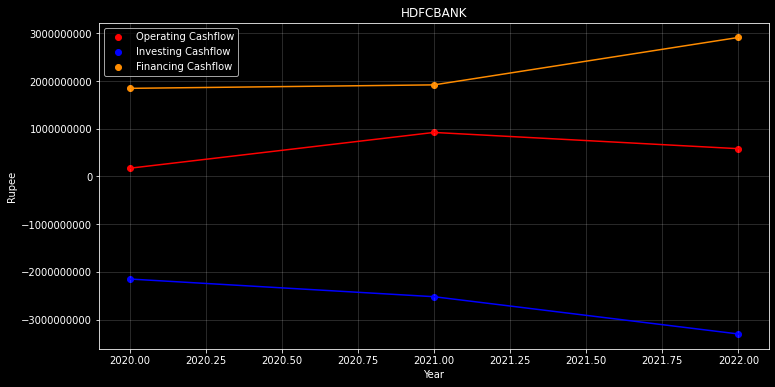

In [76]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))

#Total Assets
plt.plot(df_operating_cash_flow_income.year,df_operating_cash_flow_income.cash, color="red")
plt.scatter(df_operating_cash_flow_income.year,df_operating_cash_flow_income.cash, color="red", label="Operating Cashflow")

# Total Liabilities
plt.plot(df_investing_cashflow.year,df_investing_cashflow.cash, color="blue")
plt.scatter(df_investing_cashflow.year,df_investing_cashflow.cash, color="blue", label="Investing Cashflow")

# Total Liabilities
plt.plot(df_financing_cashflow.year,df_financing_cashflow.cash, color="darkorange")
plt.scatter(df_financing_cashflow.year,df_financing_cashflow.cash, color="darkorange", label="Financing Cashflow")

plt.ticklabel_format(axis='y', style='plain')
plt.title("HDFCBANK")
plt.xlabel("Year")
plt.ylabel("Rupee")
ax.grid(color='white', alpha=0.20)
plt.legend(loc="upper left")
plt.show()

### CHANGE IN WORKING CAPITAL

In [77]:
change_working_capital = cashflow_annually.loc[19]
change_working_capital

breakdown    Change in working capital
2022                          58907300
2021                         472346000
2020                        -230662300
Name: 19, dtype: object

In [78]:
year = []
cash = []

for k, v in change_working_capital.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        cash.append(int(v))

df_change_working_capital = pd.DataFrame({'year': year, 'cash': cash})

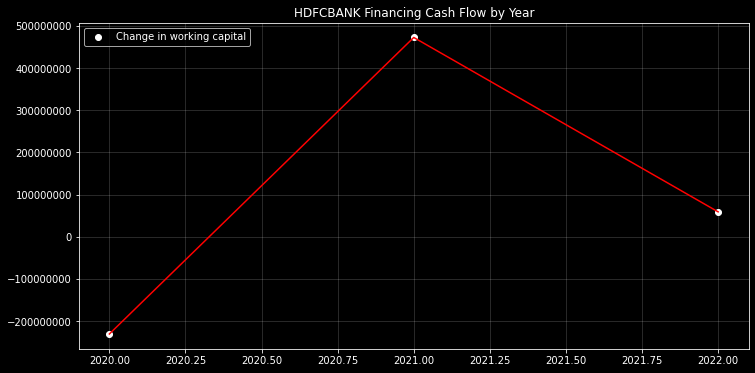

In [79]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))

# Total Liabilities
plt.plot(df_change_working_capital.year,df_change_working_capital.cash, color="red")
plt.scatter(df_change_working_capital.year,df_change_working_capital.cash, color="white", label="Change in working capital")

plt.ticklabel_format(axis='y', style='plain')
plt.title("HDFCBANK Financing Cash Flow by Year")
ax.grid(color='white', alpha=0.20)
plt.legend(loc="upper left")
plt.show()

### CASH DIVIDENDS PAID

In [80]:
cash_dividends_paid = cashflow_annually.loc[54]
cash_dividends_paid

breakdown    Cash Dividends Paid
2022                   -36239200
2021                     -166600
2020                   -66447300
Name: 54, dtype: object

In [81]:
year = []
cash = []

for k, v in cash_dividends_paid.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        cash.append(int(v))

df_cash_dividends_paid = pd.DataFrame({'year': year, 'cash': cash})

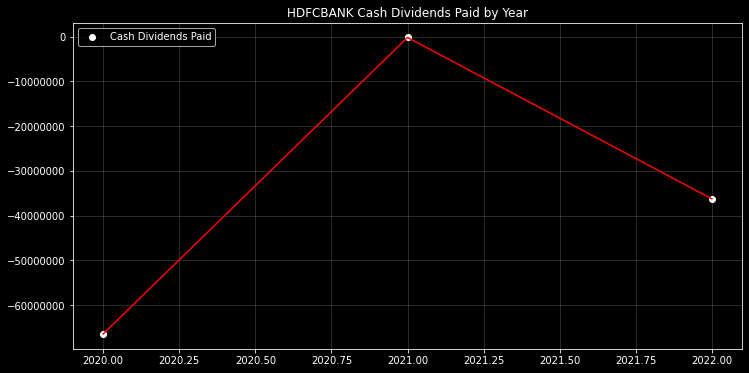

In [82]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))

# Total Liabilities
plt.plot(df_cash_dividends_paid.year,df_cash_dividends_paid.cash, color="red")
plt.scatter(df_cash_dividends_paid.year,df_cash_dividends_paid.cash, color="white", label="Cash Dividends Paid")

plt.ticklabel_format(axis='y', style='plain')
plt.title("HDFCBANK Cash Dividends Paid by Year")
ax.grid(color='white', alpha=0.20)
plt.legend(loc="upper left")
plt.show()

### CHANGES IN CASH

In [83]:
changes_in_cash = cashflow_annually.loc[59]
changes_in_cash

breakdown    Changes in Cash
2022               190845900
2021               318995900
2020              -133522100
Name: 59, dtype: object

In [84]:
year = []
cash = []

for k, v in changes_in_cash.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        cash.append(int(v))

df_changes_in_cash = pd.DataFrame({'year': year, 'cash': cash})

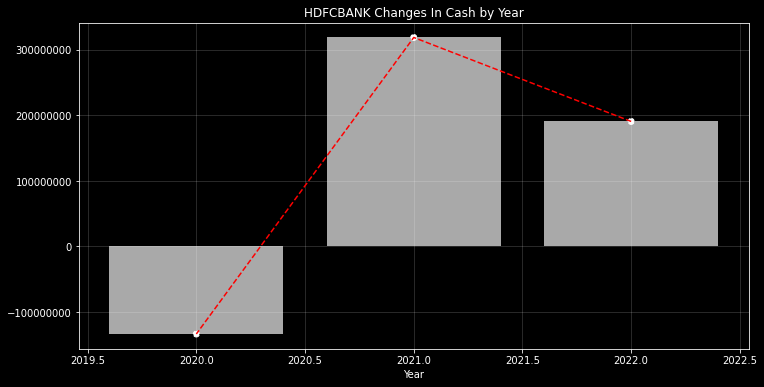

In [85]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar( df_changes_in_cash.year, df_changes_in_cash.cash, color="darkgrey")
plt.plot( df_changes_in_cash.year, df_changes_in_cash.cash, color="red", linestyle="--")
plt.scatter( df_changes_in_cash.year, df_changes_in_cash.cash, color="white", linestyle="--")
plt.ticklabel_format(axis='y', style='plain')
plt.title("HDFCBANK Changes In Cash by Year")
plt.xlabel("Year")
ax.grid(color='white', alpha=0.20)
plt.show()

### BEGINNING CASH POSITION 

In [86]:
cash_At_start_Of_Period = cashflow_annually.iloc[61]
cash_At_start_Of_Period

breakdown    Beginning Cash Position
2022                       930694700
2021                       611961000
2020                       734872600
Name: 61, dtype: object

In [87]:
year = []
cash = []

for k, v in cash_At_start_Of_Period.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        cash.append(int(v))

df_cash_At_start_Of_Period = pd.DataFrame({'year': year, 'cash': cash})

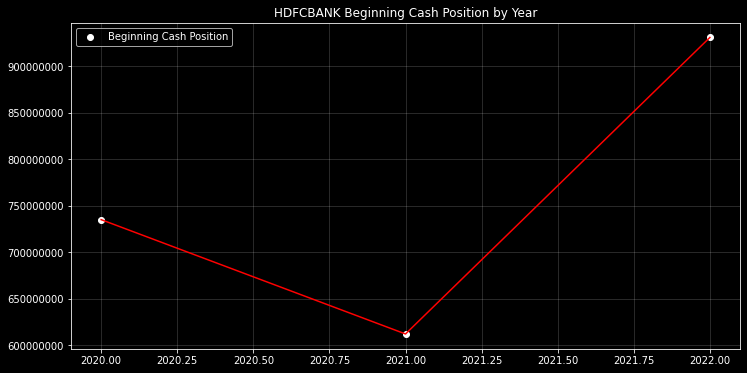

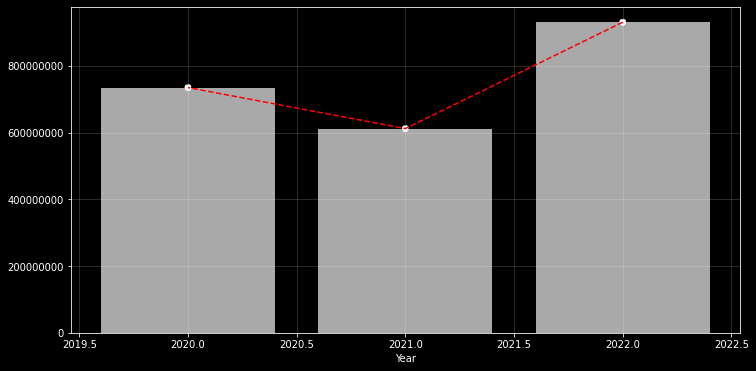

In [88]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))

# Total Liabilities
plt.plot(df_cash_At_start_Of_Period.year,df_cash_At_start_Of_Period.cash, color="red")
plt.scatter(df_cash_At_start_Of_Period.year,df_cash_At_start_Of_Period.cash, color="white", label="Beginning Cash Position")

plt.ticklabel_format(axis='y', style='plain')
plt.title("HDFCBANK Beginning Cash Position by Year")
ax.grid(color='white', alpha=0.20)
plt.legend(loc="upper left")
plt.show()

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar( df_cash_At_start_Of_Period.year, df_cash_At_start_Of_Period.cash, color="darkgrey")
plt.plot( df_cash_At_start_Of_Period.year, df_cash_At_start_Of_Period.cash, color="red", linestyle="--")
plt.scatter( df_cash_At_start_Of_Period.year, df_cash_At_start_Of_Period.cash, color="white", linestyle="--")
plt.ticklabel_format(axis='y', style='plain')
plt.xlabel("Year")
ax.grid(color='white', alpha=0.20)
plt.show()

### END CASH POSITION

In [89]:
cash_At_End_Of_Period = cashflow_annually.iloc[58]
cash_At_End_Of_Period

breakdown    End Cash Position
2022                1122031100
2021                 930694700
2020                 611961000
Name: 58, dtype: object

In [90]:
year = []
cash = []

for k, v in cash_At_End_Of_Period.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        cash.append(int(v))

df_cash_At_End_Of_Period = pd.DataFrame({'year': year, 'cash': cash})

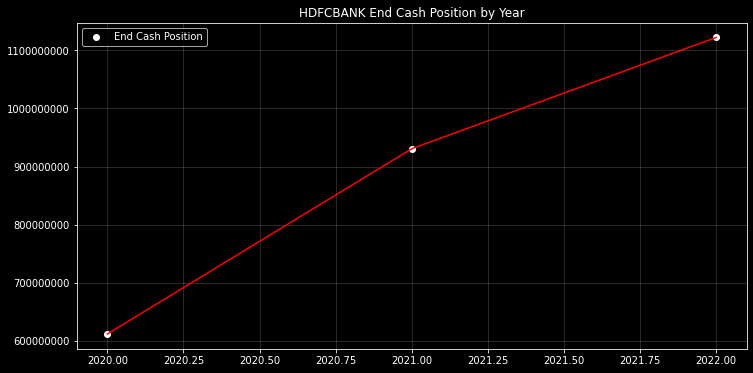

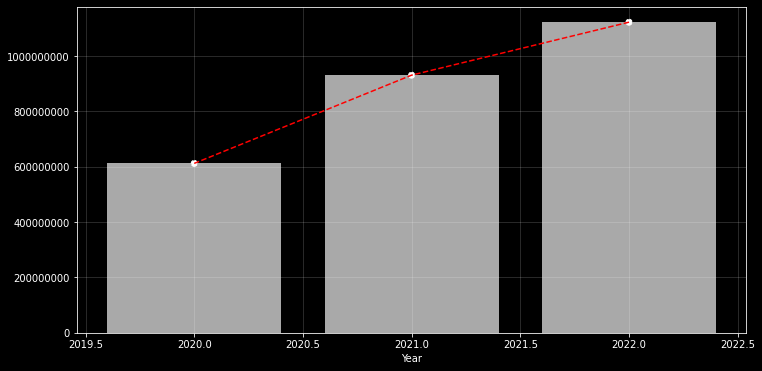

In [91]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))

# Total Liabilities
plt.plot(df_cash_At_End_Of_Period.year,df_cash_At_End_Of_Period.cash, color="red")
plt.scatter(df_cash_At_End_Of_Period.year,df_cash_At_End_Of_Period.cash, color="white", label="End Cash Position")

plt.ticklabel_format(axis='y', style='plain')
plt.title("HDFCBANK End Cash Position by Year")
ax.grid(color='white', alpha=0.20)
plt.legend(loc="upper left")
plt.show()

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar( df_cash_At_End_Of_Period.year, df_cash_At_End_Of_Period.cash, color="darkgrey")
plt.plot( df_cash_At_End_Of_Period.year, df_cash_At_End_Of_Period.cash, color="red", linestyle="--")
plt.scatter( df_cash_At_End_Of_Period.year, df_cash_At_End_Of_Period.cash, color="white", linestyle="--")
plt.ticklabel_format(axis='y', style='plain')
plt.xlabel("Year")
ax.grid(color='white', alpha=0.20)
plt.show()

### COMPARING BEGINNING CASH POSITION WITH END CASH POSITION

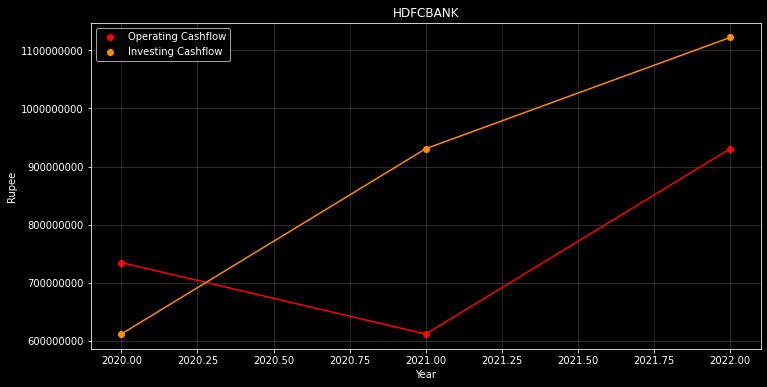

In [92]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))

#Total Assets
plt.plot(df_cash_At_start_Of_Period.year,df_cash_At_start_Of_Period.cash, color="red")
plt.scatter(df_cash_At_start_Of_Period.year,df_cash_At_start_Of_Period.cash, color="red", label="Operating Cashflow")

# Total Liabilities
plt.plot(df_cash_At_End_Of_Period.year,df_cash_At_End_Of_Period.cash, color="darkorange")
plt.scatter(df_cash_At_End_Of_Period.year,df_cash_At_End_Of_Period.cash, color="darkorange", label="Investing Cashflow")

plt.ticklabel_format(axis='y', style='plain')
plt.title("HDFCBANK")
plt.xlabel("Year")
plt.ylabel("Rupee")
ax.grid(color='white', alpha=0.20)
plt.legend(loc="upper left")
plt.show()

### DEBT REPAYMENT

In [93]:
debtRepayment = cashflow_annually.iloc[67]
debtRepayment

breakdown    Repayment of Debt
2022                -353325700
2021                -326285000
2020                -315209600
Name: 67, dtype: object

In [94]:
year = []
cash = []

for k, v in debtRepayment.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        cash.append(int(v))

df_debtRepayment = pd.DataFrame({'year': year, 'cash': cash})

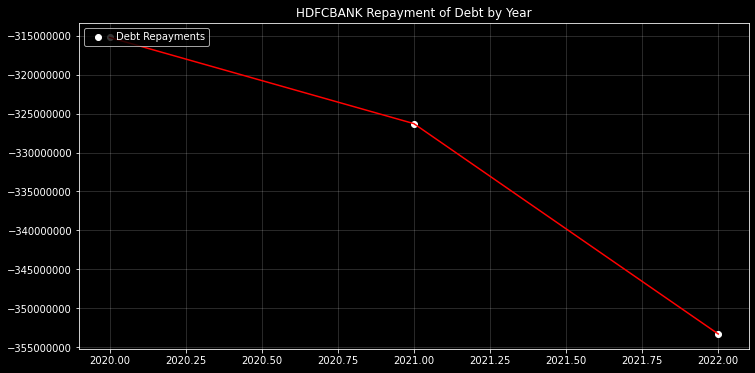

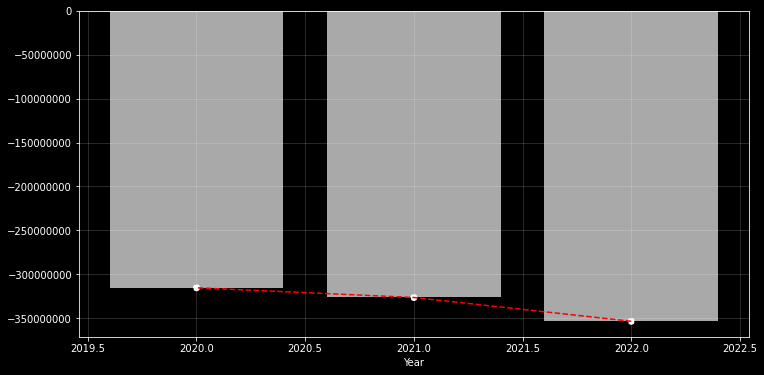

In [95]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))

# Total Liabilities
plt.plot(df_debtRepayment.year,df_debtRepayment.cash, color="red")
plt.scatter(df_debtRepayment.year,df_debtRepayment.cash, color="white", label="Debt Repayments")

plt.ticklabel_format(axis='y', style='plain')
plt.title("HDFCBANK Repayment of Debt by Year")
ax.grid(color='white', alpha=0.20)
plt.legend(loc="upper left")
plt.show()

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar( df_debtRepayment.year, df_debtRepayment.cash, color="darkgrey")
plt.plot( df_debtRepayment.year, df_debtRepayment.cash, color="red", linestyle="--")
plt.scatter( df_debtRepayment.year, df_debtRepayment.cash, color="white", linestyle="--")
plt.ticklabel_format(axis='y', style='plain')
plt.xlabel("Year")
ax.grid(color='white', alpha=0.20)
plt.show()

### FREE CASHFLOW

In [96]:
FreeCashFlow = cashflow_annually.iloc[68]
FreeCashFlow 

breakdown    Free Cash Flow
2022              554693800
2021              903969700
2020              152885400
Name: 68, dtype: object

In [97]:
year = []
cash = []

for k, v in FreeCashFlow.items():
    if k != 'breakdown':  # skip the header
        year.append(int(k))
        cash.append(int(v))

df_FreeCashFlow = pd.DataFrame({'year': year, 'cash': cash})

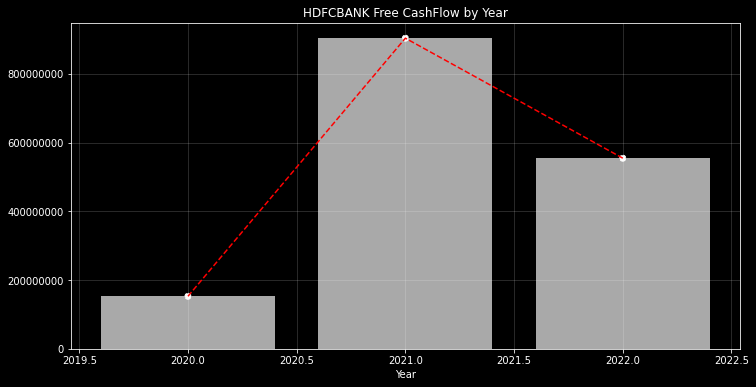

In [98]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar( df_FreeCashFlow.year, df_FreeCashFlow.cash, color="darkgrey")
plt.plot( df_FreeCashFlow.year, df_FreeCashFlow.cash, color="red", linestyle="--")
plt.scatter( df_FreeCashFlow.year, df_FreeCashFlow.cash, color="white", linestyle="--")
plt.ticklabel_format(axis='y', style='plain')
plt.xlabel("Year")
plt.title("HDFCBANK Free CashFlow by Year")
ax.grid(color='white', alpha=0.20)
plt.show()

### Disclaimer

##### This notebook is entirely informative. None of the content presented in this notebook constitutes a recommendation that any particular security, portfolio of securities, transaction or investment strategy is suitable for any specific person. Futures, stocks and options trading involves substantial risk of loss and is not suitable for every investor. The valuation of futures, stocks and options may fluctuate, and, as a result, clients may lose more than their original investment.

##### All trading strategies are used at your own risk.

##### There are many many more details to explore - in choosing data features, in choosing algorithms, in tuning the algos, etc. I am sure there are many unaswered parts of the process. So, any comments and suggestion - please do share. I'd be happy to add and test any ideas in the current process.

##### Thanks for reading.

##### Best, 
##### Chrisler